# Import Packages

In [1]:
from fastai import *
from fastai.vision import *

%matplotlib inline

# EDA

We are going to use the [Oxford-IIIT Pet Dataset](http://www.robots.ox.ac.uk/~vgg/data/pets/) by [O. M. Parkhi et al., 2012](http://www.robots.ox.ac.uk/~vgg/publications/2012/parkhi12a/parkhi12a.pdf) which features 12 cat breeds and 25 dogs breeds. Our model will need to learn to differentiate between these 37 distinct categories. According to their paper, the best accuracy they could get in 2012 was 59.21%, using a complex model that was specific to pet detection, with separate "Image", "Head", and "Body" models for the pet photos. Let's see how accurate we can be using deep learning!

In [2]:
# Download the data and get the root path
path = untar_data(URLs.PETS)
path

PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet')

In [3]:
path.ls()

[PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images')]

In [3]:
imgs_path = path / 'images'

In [4]:
fnames = get_image_files(imgs_path)
fnames[:5]

[PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/pomeranian_27.jpg'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/Maine_Coon_7.jpg'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/newfoundland_29.jpg'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/shiba_inu_135.jpg'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/Maine_Coon_192.jpg')]

In [20]:
# Extract labels from file names
pat = re.compile(r'(\w+)_\d+')
fname_labels = [pat.search(fname.stem).group(1) for fname in fnames]
print(pd.DataFrame({'labels': fname_labels})['labels'].value_counts())

american_pit_bull_terrier     200
beagle                        200
pug                           200
samoyed                       200
boxer                         200
Siamese                       200
miniature_pinscher            200
Egyptian_Mau                  200
great_pyrenees                200
leonberger                    200
yorkshire_terrier             200
Abyssinian                    200
keeshond                      200
english_cocker_spaniel        200
chihuahua                     200
german_shorthaired            200
shiba_inu                     200
Ragdoll                       200
american_bulldog              200
newfoundland                  200
Persian                       200
basset_hound                  200
Russian_Blue                  200
British_Shorthair             200
english_setter                200
Birman                        200
wheaten_terrier               200
pomeranian                    200
Sphynx                        200
saint_bernard 

In [13]:
# Create data object
BS = 64
np.random.seed(2)           # Used for reproducability since we are splitting
                            # data into train/valid randomly
pattern = r'/([^/]+)_\d+.jpg$'
data = ImageDataBunch.from_name_re(path=imgs_path, fnames=fnames,
                                   pat=pattern,
                                   ds_tfms=get_transforms(), size=224,
                                   bs=BS
                                  ).normalize(imagenet_stats)

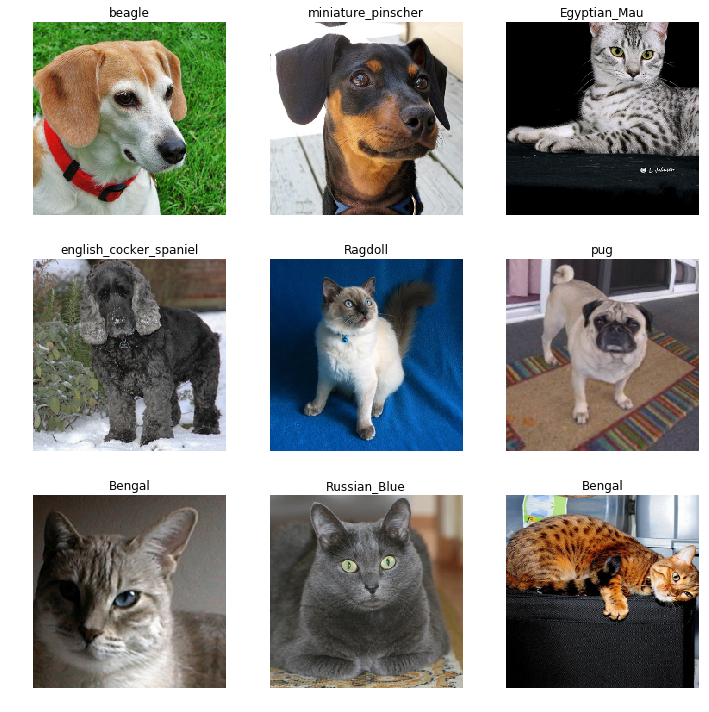

In [14]:
data.show_batch(rows=3, figsize=(10,10))

In [16]:
len(data.classes), data.c

(37, 37)

In [15]:
print(data.classes)

['pomeranian', 'Maine_Coon', 'newfoundland', 'beagle', 'Bengal', 'British_Shorthair', 'Egyptian_Mau', 'miniature_pinscher', 'Birman', 'leonberger', 'american_bulldog', 'Abyssinian', 'Siamese', 'staffordshire_bull_terrier', 'pug', 'american_pit_bull_terrier', 'shiba_inu', 'basset_hound', 'Russian_Blue', 'english_cocker_spaniel', 'chihuahua', 'Ragdoll', 'havanese', 'yorkshire_terrier', 'german_shorthaired', 'samoyed', 'keeshond', 'scottish_terrier', 'Sphynx', 'english_setter', 'Persian', 'japanese_chin', 'saint_bernard', 'Bombay', 'wheaten_terrier', 'boxer', 'great_pyrenees']


# Training: resnet34

In [30]:
# Create a CNN using pretrained resnet34
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [31]:
models.resnet34()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [32]:
learn.layer_groups

[Sequential(
   (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
   (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (2): ReLU(inplace)
   (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
   (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
   (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (6): ReLU(inplace)
   (7): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
   (8): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (9): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
   (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (11): ReLU(inplace)
   (12): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
   (13): BatchNorm2d(64, eps=1e-05, momentum=0.1, affi

In [33]:
# Check learning rate finder
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


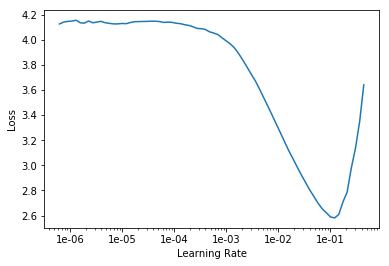

In [34]:
learn.recorder.plot()

In [35]:
3e-3

0.003

In [36]:
# Will use resnet34 as a feature extraction and only train the classifier
learn.fit_one_cycle(cyc_len=6, max_lr=1e-2)

Total time: 03:16
epoch  train_loss  valid_loss  error_rate
1      0.789967    0.324344    0.104871    (00:31)
2      0.705486    1.185733    0.321380    (00:32)
3      0.654439    0.547169    0.172530    (00:32)
4      0.464006    0.319042    0.098106    (00:32)
5      0.305163    0.241415    0.081191    (00:33)
6      0.225648    0.210366    0.073748    (00:33)



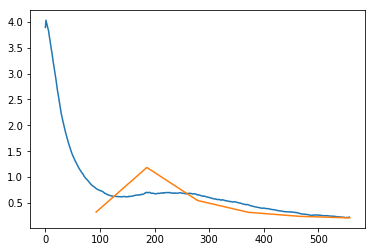

In [37]:
learn.recorder.plot_losses()

In [48]:
# Create a CNN using pretrained resnet34 with default learning rate 3e-3
learn = create_cnn(data, models.resnet34, metrics=error_rate)
learn.fit_one_cycle(cyc_len=6)

Total time: 03:16
epoch  train_loss  valid_loss  error_rate
1      1.380745    0.352583    0.097429    (00:31)
2      0.553800    0.254429    0.079161    (00:32)
3      0.362511    0.220533    0.069012    (00:33)
4      0.275461    0.197706    0.065629    (00:33)
5      0.204908    0.177061    0.064276    (00:33)
6      0.182529    0.176006    0.058187    (00:33)



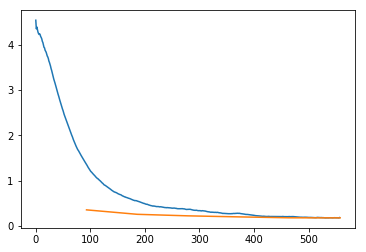

In [49]:
learn.recorder.plot_losses()

In [50]:
learn.save('resnet34-feature-extraction')

# Results

Let's see what results we have got. 

We will first see which were the categories that the model most confused with one another. We will try to see if what the model predicted was reasonable or not. In this case the mistakes look reasonable (none of the mistakes seems obviously naive). This is an indicator that our classifier is working correctly. 

Furthermore, when we plot the confusion matrix, we can see that the distribution is heavily skewed: the model makes the same mistakes over and over again but it rarely confuses other categories. This suggests that it just finds it difficult to distinguish some specific categories between each other; this is normal behaviour.

In [41]:
interp = ClassificationInterpretation.from_learner(learn)

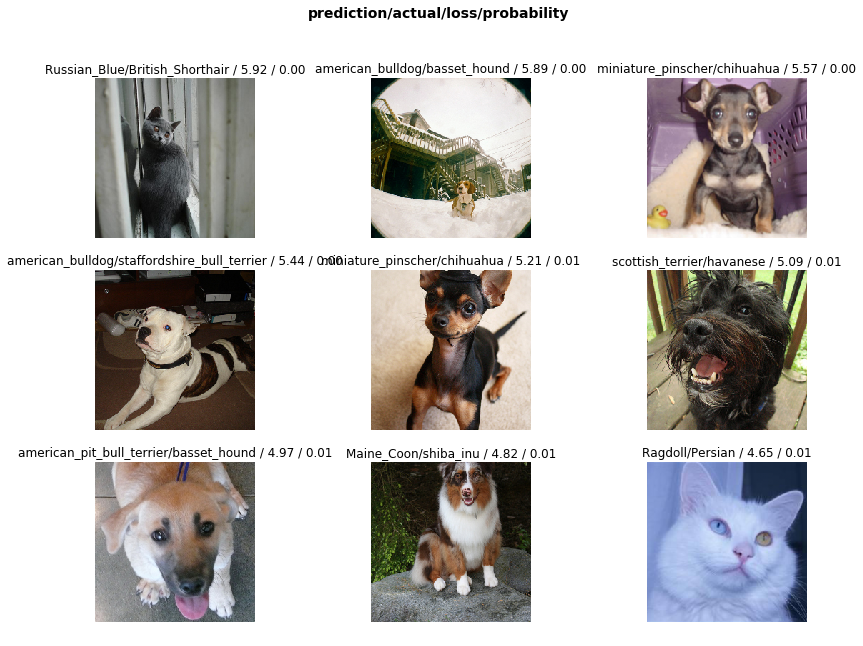

In [42]:
interp.plot_top_losses(9, figsize=(14,10))

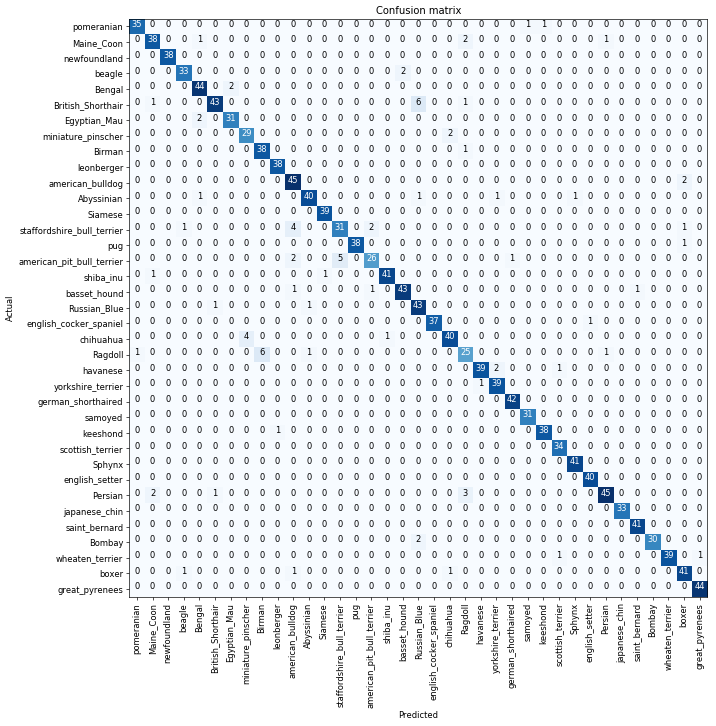

In [43]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [44]:
# Get the categories that the classifier is most confused about
interp.most_confused(min_val=2)

[('British_Shorthair', 'Russian_Blue', 6),
 ('Ragdoll', 'Birman', 6),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 5),
 ('staffordshire_bull_terrier', 'american_bulldog', 4),
 ('chihuahua', 'miniature_pinscher', 4),
 ('Persian', 'Ragdoll', 3)]

# Unfreezing, fine-tuning, and learning rates

Since our model is working as we expect it to, we will *unfreeze* our model and train some more.

In [51]:
# Load the model
learn = create_cnn(data, models.resnet34, metrics=error_rate)
learn.load('resnet34-feature-extraction')

Learner(data=ImageDataBunch;
Train: LabelList
y: CategoryList (5912 items)
[Category pomeranian, Category Maine_Coon, Category newfoundland, Category beagle, Category Bengal]...
Path: .
x: ImageItemList (5912 items)
[Image (3, 500, 375), Image (3, 275, 183), Image (3, 375, 500), Image (3, 375, 500), Image (3, 333, 500)]...
Path: /home/jupyter/.fastai/data/oxford-iiit-pet/images;
Valid: LabelList
y: CategoryList (1478 items)
[Category Persian, Category Abyssinian, Category wheaten_terrier, Category Maine_Coon, Category Siamese]...
Path: .
x: ImageItemList (1478 items)
[Image (3, 333, 500), Image (3, 500, 414), Image (3, 500, 333), Image (3, 500, 406), Image (3, 375, 500)]...
Path: /home/jupyter/.fastai/data/oxford-iiit-pet/images;
Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxP

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


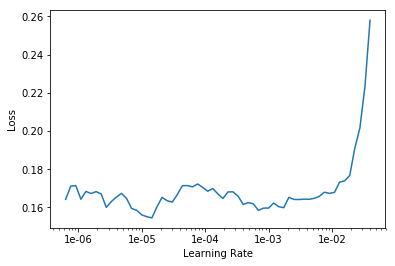

In [52]:
learn.lr_find()
learn.recorder.plot()

Looks like the 1e-4 is the lr that yields the lowest loss. This will be the learning rate used for the classifier. We will use the an interval betweeb 1e-6-1e-4 lr where lower layers will have lower lr and higher layers will have higher lr.

In [53]:
# Unfreeze the model and fit it again using the interval lr
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

Total time: 01:23
epoch  train_loss  valid_loss  error_rate
1      0.152805    0.171140    0.054127    (00:41)
2      0.156684    0.164632    0.057510    (00:41)



That's a pretty accurate model!

In [54]:
learn.save('resnet34-fine-tuned')

# Training: resnet50

In [5]:
# Reduce the batch size to fit in memory
BS = 32
np.random.seed(2)           
pattern = r'/([^/]+)_\d+.jpg$'
data = ImageDataBunch.from_name_re(path=imgs_path, fnames=fnames,
                                   pat=pattern,
                                   ds_tfms=get_transforms(), size=224,
                                   bs=BS
                                  ).normalize(imagenet_stats)

In [6]:
# Recreate a CNN using resnet50
learn = create_cnn(data, models.resnet50, metrics=error_rate)

In [7]:
# Fit the model 
learn.fit_one_cycle(8)

Total time: 08:10
epoch  train_loss  valid_loss  error_rate
1      0.604010    0.266360    0.081867    (01:05)
2      0.406904    0.253553    0.085927    (01:00)
3      0.366840    0.216768    0.075778    (01:00)
4      0.326173    0.222375    0.073072    (01:00)
5      0.241759    0.201909    0.066982    (01:01)
6      0.165826    0.166624    0.050068    (01:00)
7      0.120390    0.163660    0.053451    (01:01)
8      0.119750    0.163638    0.052774    (01:00)



In [8]:
# Save the model
learn.save('resnet50-feature-extraction')

It's astonishing that it's possible to recognize pet breeds so accurately! Let's see if full fine-tuning helps:

In [22]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


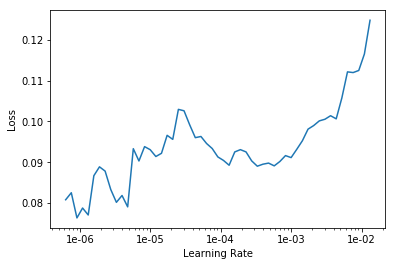

In [24]:
learn.recorder.plot()

In [25]:
# Fine tune the model
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-7,1e-4))

Total time: 04:02
epoch  train_loss  valid_loss  error_rate
1      0.121154    0.157182    0.052774    (01:21)
2      0.107582    0.156742    0.050744    (01:20)
3      0.101033    0.153185    0.051421    (01:20)



If it doesn't, you can always go back to your previous model.

In [26]:
learn.save('resnet50-fine-tuned')

In [27]:
interp = ClassificationInterpretation.from_learner(learn)

In [28]:
interp.most_confused(min_val=2)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 6),
 ('Bengal', 'Egyptian_Mau', 4),
 ('Ragdoll', 'Birman', 4),
 ('Birman', 'Ragdoll', 3),
 ('staffordshire_bull_terrier', 'american_bulldog', 3),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 3),
 ('basset_hound', 'beagle', 3),
 ('Russian_Blue', 'British_Shorthair', 3),
 ('chihuahua', 'miniature_pinscher', 3)]

In [29]:
(imgs_path / 'models').ls()

[PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/models/tmp.pth'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/models/resnet50-fine-tuned.pth'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/models/resnet50-feature-extraction.pth'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/models/resnet34-feature-extraction.pth'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/models/resnet34-fine-tuned.pth')]